# `librosia`

- [tutorial](https://librosa.org/doc/latest/tutorial.html)
- different features: https://librosa.org/doc/latest/feature.html

In [1]:
import librosa
import matplotlib
import matplotlib.pyplot as plt

import numpy as np
np.set_printoptions(precision=4, suppress=True)

## Load audio file

- `waveform`: decoded audio as a time series
    - one-dimensional NumPy float array
- `sampling_rate`: number of samples per second
    - default: resampled to 22,050 Hz mono

In [2]:
waveform, sampling_rate = librosa.load('../data/3_1.flac')

In [3]:
print(waveform)
print(sampling_rate)

[ 0.0018  0.0027  0.0024 ... -0.0004 -0.0004 -0.0004]
22050


## Short-time Fourier Transformation & Chroma STFT

https://librosa.org/doc/latest/generated/librosa.feature.chroma_stft.html

In [4]:
stft = np.abs(librosa.stft(waveform))
print(stft)

[[0.0317 0.0616 0.1223 ... 0.0138 0.0149 0.0073]
 [0.0565 0.0893 0.0571 ... 0.0066 0.008  0.0086]
 [0.0976 0.0204 0.1069 ... 0.0016 0.001  0.0079]
 ...
 [0.     0.     0.     ... 0.     0.     0.0001]
 [0.     0.     0.     ... 0.     0.     0.0001]
 [0.     0.     0.     ... 0.     0.     0.0001]]


In [7]:
chroma = librosa.feature.chroma_stft(S=stft, sr=sampling_rate)
print(chroma)

[[0.5658 0.7641 0.7334 ... 0.759  0.5875 0.8558]
 [0.6764 0.939  0.9085 ... 0.8326 0.6789 0.9525]
 [0.7378 0.7481 0.744  ... 0.81   0.5788 0.7297]
 ...
 [0.749  0.9438 0.9601 ... 0.8388 0.6648 0.7316]
 [0.8926 1.     1.     ... 0.6687 0.6282 0.9039]
 [0.6984 0.8502 0.7989 ... 0.7465 0.647  0.8793]]


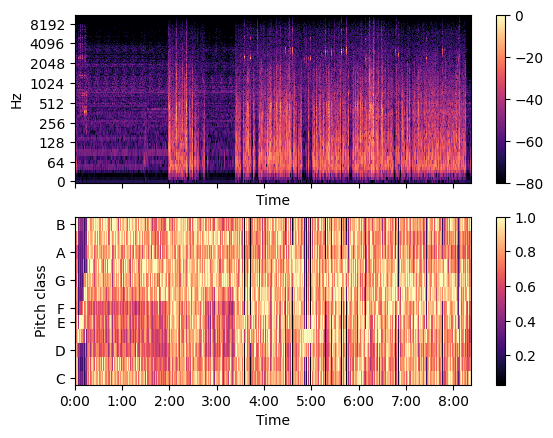

In [9]:
fig, ax = plt.subplots(nrows=2, sharex=True)
img = librosa.display.specshow(librosa.amplitude_to_db(stft, ref=np.max), y_axis='log', x_axis='time', ax=ax[0])

fig.colorbar(img, ax=ax[0])
ax[0].label_outer()

img = librosa.display.specshow(chroma, y_axis='chroma', x_axis='time', ax=ax[1])
fig.colorbar(img, ax=ax[1])

# MFCC

- *Mel-frequency cepstral* coefficients
- `hop_length`: number of samples between successive frames

https://librosa.org/doc/latest/generated/librosa.feature.mfcc.html

In [10]:
# Set the hop length; at 22050 Hz, 512 samples ~= 23ms
hop_length = 512

mfcc = librosa.feature.mfcc(y=waveform, sr=sampling_rate, hop_length=hop_length)
mfcc

array([[-461.8539, -279.069 , -240.7989, ..., -607.5505, -609.5594,
        -613.1534],
       [ 111.5121,   97.4792,   99.9282, ...,   76.9676,   75.2598,
          71.9312],
       [  -1.2244,  -13.1132,  -13.477 , ...,   39.5973,   40.3333,
          40.4476],
       ...,
       [   0.0884,    5.4783,    4.4482, ...,    0.1943,    1.5634,
           3.2866],
       [   2.3633,    3.2392,    3.606 , ...,    3.3667,    3.7331,
           4.0652],
       [  -2.2283,    6.8429,    6.5014, ...,    2.4105,    1.6851,
           1.7717]], dtype=float32)

# Chroma STFT

- Chroma Short-time Fourier Tranformation
- chromagram from a waveform or power spectogram

https://librosa.org/doc/latest/generated/librosa.feature.chroma_stft.html

In [20]:
chroma_stft = librosa.feature.chroma_stft(y=waveform, hop_length=hop_length)
chroma_stft

array([[0.3706, 0.4707, 0.3351, ..., 0.4287, 0.2977, 0.7684],
       [0.4698, 0.7234, 0.5225, ..., 0.4367, 0.3146, 0.7369],
       [0.5637, 0.4546, 0.3427, ..., 0.4502, 0.2721, 0.4342],
       ...,
       [0.581 , 0.7616, 0.5952, ..., 0.521 , 0.3523, 0.4439],
       [0.744 , 0.7475, 0.5749, ..., 0.2976, 0.3243, 0.6652],
       [0.494 , 0.5225, 0.3603, ..., 0.4105, 0.3811, 0.8092]],
      dtype=float32)

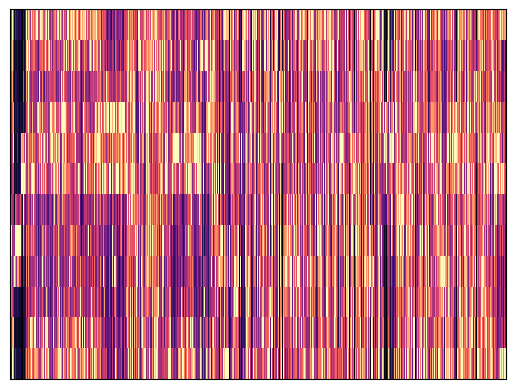

In [22]:
librosa.display.specshow(chroma_stft, hop_length=hop_length)